In [2]:
from forest import *

## The Pearson's Chi-square Test
Suppose a discrete variable $X$ has three outcomes
$$
p_{X,1} = P(X=1),\;p_{X,2} = P(X=2),\;p_{X,3} = P(X=3).
$$
Another discrete variable $Y$ has three outcomes
$$
p_{Y,1} = P(Y=1),\;p_{Y,2} = P(Y=2),\;p_{Y,3} = P(Y=3).
$$
We want to test that
$$
H_0: p_{X,1} = p_{Y,1},\; p_{X,2} = p_{Y,2},\;p_{X,3} = p_{Y,3}.
$$

After collecting samples
- $X_1,\cdots, X_{n_X}\sim X$ and
- $Y_1,\cdots, Y_{n_Y}\sim Y$,

we can count the number of $X_i$ falling each category $\{1,2,3\}$.

|     | Choice 1   |   Choice 2 |    Choice 3 | <div style="width:30px">Total</div> |
|------|------|-----|-----|-----------:|
|   **X**  | $n_{X,1}$| $n_{X,2}$| $n_{X,3}$| $n_{X}$|
|   **Y**  | $n_{Y,1}$| $n_{Y,2}$| $n_{Y,3}$| $n_{Y}$|




For $k=1,\cdots, c$ ($c=3$ in the above example), estimate the probability of each choice
$$
\begin{align}
\hat{p}_{Xk}& = P(X=k) = \frac{n_{X,k}}{n_{X}};\\
\hat{p}_{Yk}& = P(Y=k) = \frac{n_{Y,k}}{n_{Y}};\\
\hat{p}_{k}&= \frac{n_{X,k} + n_{Y,k}}{n_{X}+n_{Y}},\quad \text{assuming }P(X=k)=P(Y=k).\\
\end{align}
$$

The Pearson's chi-square statistics is
$$
Q = \frac{n_X\cdot n_Y}{n_X+n_Y}  \sum_{k=1}^{c+1}
\frac{(\hat{p}_{Xk} - \hat{p}_{Yk})^2}{\hat{p}_{k}} \to \chi_c^2.
$$


When $c$ is relatively large, it approximately holds that
$$
\frac{Q - c}{\sqrt{2c}}\sim N(0,1).
$$

## Testing Based on Sample Space Partition


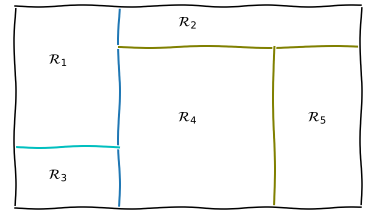

In [3]:
with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.axvline(x=0.3)
    xseq = np.linspace(0,0.3,100)
    yseq = np.repeat(0.3,100)
    plt.plot(xseq,yseq,"c")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    xseq = np.linspace(0.3,1,100)
    yseq = np.repeat(0.8,100)
    plt.plot(xseq,yseq,"olive")
    xseq = np.repeat(0.75,100)
    yseq = np.linspace(0,0.8,100)
    plt.plot(xseq,yseq,"olive")
    ax.set_xticks([])
    ax.set_yticks([])
    fig.text(0.5, 0.5,r'$\mathcal{R}_4$',ha='center')
    fig.text(0.5, 0.83,r'$\mathcal{R}_2$',ha='center')
    fig.text(0.2, 0.7,r'$\mathcal{R}_1$',ha='center')
    fig.text(0.2, 0.3,r'$\mathcal{R}_3$',ha='center')
    fig.text(0.8, 0.5,r'$\mathcal{R}_5$',ha='center')

- Cut the sample space into $c$ regions $\mathcal{R}_1,\cdots, \mathcal{R}_c$.
- The probability of $X$ or $Y$ falling into a region $\mathcal{R}_k$.
$$
\begin{align}
p_{Xk}& = \mathcal{P}(X\in\mathcal{R}_k) \\
p_{Yk} & = \mathcal{P}(Y\in\mathcal{R}_k)
\end{align}
$$
- The continuous distribution is discretized and we are testing
$$
p_{Xk}=p_{Yk}\;\text{ for } k=1,\cdots,c.
$$
- If $X$ and $Y$ comes from the same distribution, then $p_{Xk} = p_{Yk}$ for arbitrary partition.

## Classification Tree

The classical classification tree partions the sample space recursively by maximing the entropy.

<img style="width:500px" src="./figs/tree.png"/>

## Partition Rules for Comparision Metrics

General $f$-divergence
$$
D_\phi(P,Q) = \int q f\Big(\frac{p}{q}\Big)d\mu
=\sup_g \Big[\int gdQ - \int f^*(g)dP\Big].
$$

| <div style="width:130px">Metric</div>  | <div style="width:130px">Expression</div> | <div style="width:130px">$f(u)$</div>  |<div style="width:130px"> $f^*(g)$</div> |
|:--------|:------------|:--------|:----------|
|  Kullback-Leibler |  $\int q \log(\frac{q}{p})dx$ | $-\log(u)$ | $-1-\log(-g)$ |
|  Pearson's $\chi^2$ |  $\int \frac{(q(x)-p(x))^2}{p(x)}dx$  | $(u-1)^2$ | $(1/4)g^2+g$ |

The above means
$$
\int \frac{(q(x)-p(x))^2}{p(x)}dx=
\sup_g \Big[\int gdQ - \int \big(g^2/4+g\big)dP\Big]
$$ 
Restricting $g$ to belong to
$$
\mathcal{G} = \Big\{g:\, g(x)=\sum_{k=1}^c G_i I(x\in\mathcal{R}_i)\text{ for some } \mathcal{R}_1,\cdots,\mathcal{R}_c\Big\}.
$$

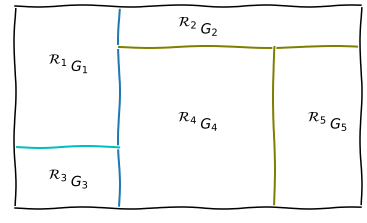

In [4]:
with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.axvline(x=0.3)
    xseq = np.linspace(0,0.3,100)
    yseq = np.repeat(0.3,100)
    plt.plot(xseq,yseq,"c")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    xseq = np.linspace(0.3,1,100)
    yseq = np.repeat(0.8,100)
    plt.plot(xseq,yseq,"olive")
    xseq = np.repeat(0.75,100)
    yseq = np.linspace(0,0.8,100)
    plt.plot(xseq,yseq,"olive")
    ax.set_xticks([])
    ax.set_yticks([])
    fig.text(0.5, 0.5,r'$\mathcal{R}_4$',ha='center')
    fig.text(0.5, 0.83,r'$\mathcal{R}_2$',ha='center')
    fig.text(0.2, 0.7,r'$\mathcal{R}_1$',ha='center')
    fig.text(0.2, 0.3,r'$\mathcal{R}_3$',ha='center')
    fig.text(0.8, 0.5,r'$\mathcal{R}_5$',ha='center')
    fig.text(0.55, 0.5-0.025,r'$G_4$',ha='center')
    fig.text(0.55, 0.83-0.025,r'$G_2$',ha='center')
    fig.text(0.25, 0.7-0.025,r'$G_1$',ha='center')
    fig.text(0.25, 0.3-0.025,r'$G_3$',ha='center')
    fig.text(0.85, 0.5-0.025,r'$G_5$',ha='center')

We get lower bound for the Pearson's $\chi^2$
$$
\begin{align}
\int \frac{(q(x)-p(x))^2}{p(x)}dx&\ge
\sup_{g\in\mathcal{G}} \Big[\int gdQ - \int \big(g^2/4+g\big)dP\Big]\\
&=\sup_{\mathcal{R}_1,\cdots,\mathcal{R}_c} \sum_{i=1}^c \frac{[Q(Y\in\mathcal{R}_i)-
P(X\in\mathcal{R}_i)]^2}{P(X\in\mathcal{R}_i)}
\end{align}
$$ 
We aims at finding the partition $\mathcal{R}_1,\cdots,\mathcal{R}_c$ maximizing the above quantity (discretized Pearson $\chi^2$).

## A Chi-Square Testing Tree

- The left column figures are samples for $X_1,\cdots, X_{n_X}$.
- The right column figures are samples for $Y_1,\cdots, Y_{n_X}$.
- The algorithm cut the sample space by maximizing the distretized Pearson's $\chi^2$.

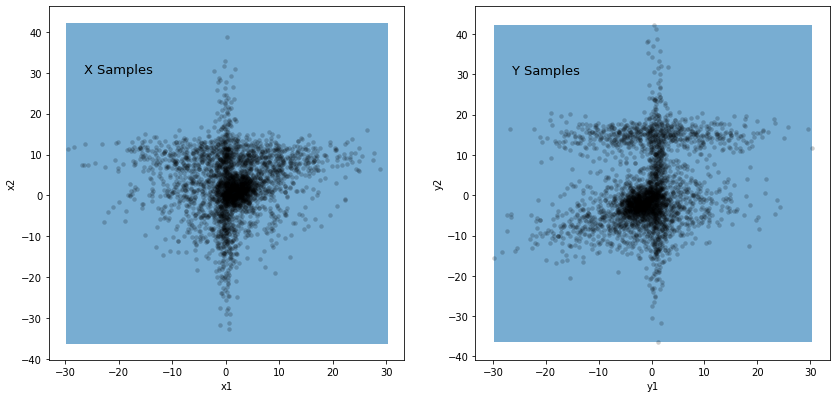

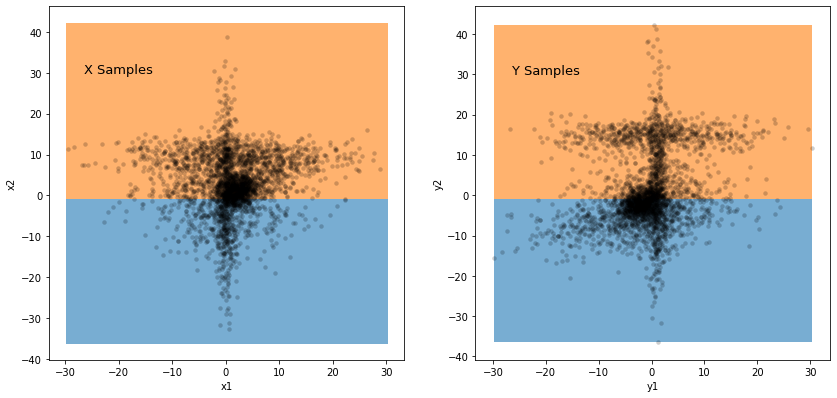

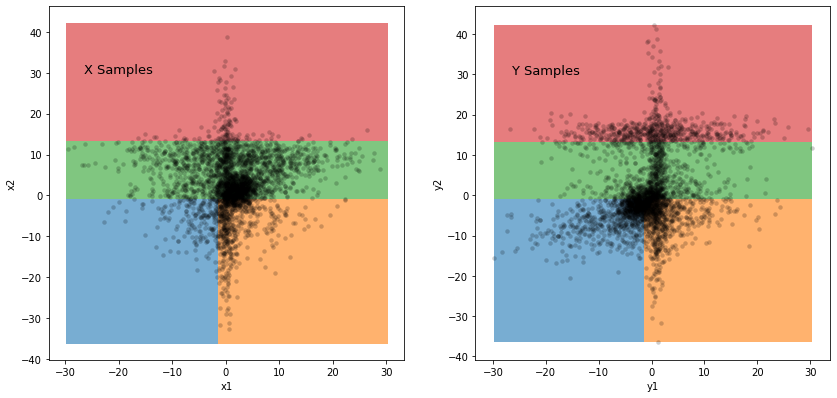

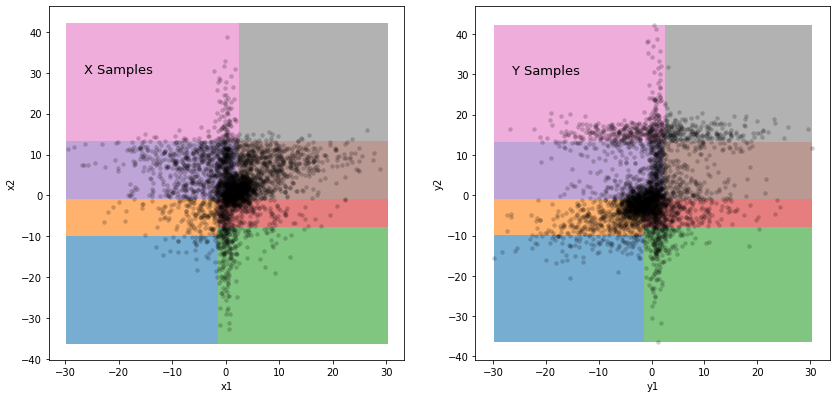

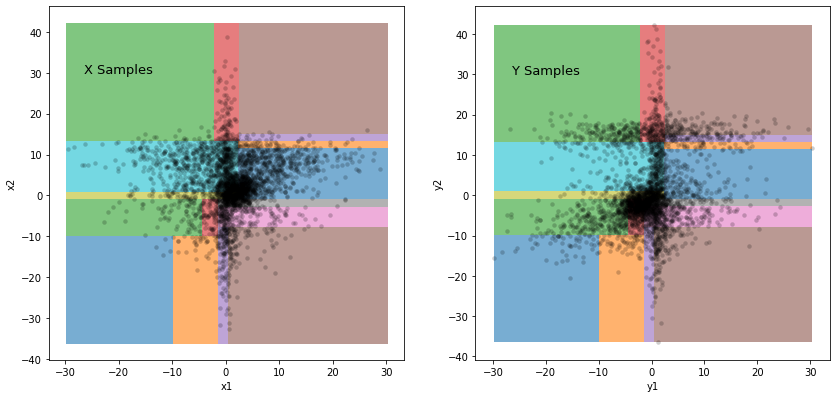

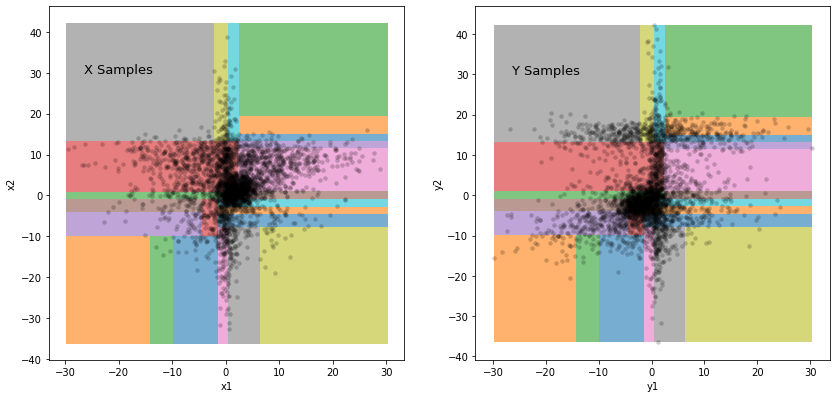

In [5]:
mean1 = [[0, 0], [0, 10], [2, 1], [1, -2], [3,5]]
mean2 = [[1, 2], [1, 15], [-2, -2], [-1, -2], [-3,-5]]
cov1 = [[[1, 0], [0, 150]], [[90, 0], [0, 5]], [[4, 1], [1, 4]], [[40, 5], [5, 40]], [[90, 15], [15, 16]]]
n1 = [100, 100, 100, 100, 100]
n2 = [600, 600, 800, 600, 600]

np.random.seed(0)
X = data_generation(mean1, cov1, n2)
Y = data_generation(mean2, cov1, n2)
one = np.ones((len(X),1))
zero = np.zeros((len(Y),1))
dataXY = np.vstack((X,Y))
labelXY = np.vstack((one,zero)) 

tree = chiSquareTree()
tree.fit(dataXY, labelXY, 6)
plot = Plot(tree)
dic = plot.domain_splits_plots()


## A Chi-Square Testing Forest

- A forest is grown by repeating the following $T$ times:
    1. Split the dataset (X,Y) into a training and a testing data;
    2. Build a chi-square tree on the training data;
    3. Compute the chi-square statistics on the testing data.
    
**Procedure:** Build $T$ trees ----> Compute $T$ statistics ----> Draw their histogram ---> Compare with the standard normal density.

### Eg. 1

Both $X_1,\cdots, X_{900}$ and $Y_1,\cdots, Y_{900}$ comes from the same distribution
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
where
$$
\boldsymbol{\mu}_1 = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_2 = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_3 = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$

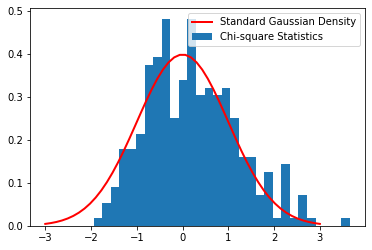

In [29]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n2 = [300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n2)
Y = data_generation(mean1, cov1, n2)
cObj = compareForest()
cObj.fit(X,Y, numT = 300, subsample = 800, maxDepth = 10)
cObj.plot()

### Eg. 2

The first group $X_1,\cdots, X_{900}$  comes from (a missing component)
$$
(1/2)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(0)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/2)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
and the second group  $Y_1,\cdots, Y_{900}$ comes from
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
where
$$
\boldsymbol{\mu}_1 = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_2 = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_3 = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$

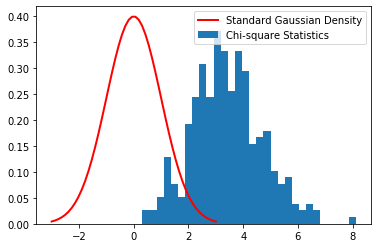

In [30]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n1 = [450, 0, 450]
n2 = [300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n1)
Y = data_generation(mean1, cov1, n2)
cObj = compareForest()
cObj.fit(X,Y, numT = 300, subsample = 800, maxDepth = 10)
cObj.plot()

### Eg. 3
Given the mixed distribution
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
The first group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{X1} = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X2} = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X3} = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$
The second group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{Y1} = \begin{pmatrix}
1\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y2} = \begin{pmatrix}
1\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y3} = \begin{pmatrix}
3\\1\\4\\5\end{pmatrix}.
$$

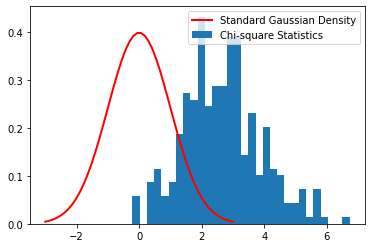

In [31]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
mean2 = [[1, 0, 0, 0], 
         [1, 10, 3, 0], 
         [3, 1, 4, 5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n2 = [300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n2)
Y = data_generation(mean2, cov1, n2)
cObj = compareForest()
cObj.fit(X,Y, numT = 300, subsample = 800, maxDepth = 8)
cObj.plot()

### Eg. 4
Given the mixed distribution
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
The first group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{X1} = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X2} = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X3} = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$
The second group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{Y1} = \begin{pmatrix}
1\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y2} = \begin{pmatrix}
1\\-10\\-3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y3} = \begin{pmatrix}
3\\-1\\-4\\-5\end{pmatrix}.
$$

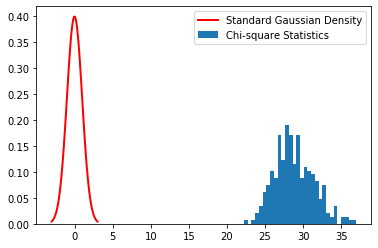

In [32]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
mean2 = [[1, 0, 0, 0], 
         [1, -10, -3, 0], 
         [3, -1, -4, -5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n2 = [300, 300, 300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n2)
Y = data_generation(mean2, cov1, n2)
cObj = compareForest()
cObj.fit(X,Y, numT = 300, subsample = 800, maxDepth = 8)
cObj.plot()